# Value Iteration — Mathematical Principle and Example

This notebook presents the mathematical principle behind **Value Iteration** (an algorithm for computing the optimal state-value function \($v^*(s)$\) and deriving an optimal policy), followed by a small runnable example (a simple gridworld) demonstrating the algorithm in code.

## Mathematical Principle

**Objective:** compute the optimal state-value function $ v^*(s) $ for an MDP, defined as the maximum expected return starting from state $ s $ and behaving optimally.

The **Bellman optimality equation** for the state-value function is:

$$
v^*(s) = \max\limits_a \sum_{s', r} p(s', r \mid s, a) \left[ r + \gamma v^*(s') \right]
$$

This is a system of nonlinear equations (because of the max over actions). Value iteration solves them by the following dynamic programming update:

$$
v_{k+1}(s) = \max\limits_a \sum_{s', r} p(s', r \mid s, a) \left[ r + \gamma v_k(s') \right]
$$

Repeat until convergence, i.e. when:

$$
\max\limits_s \left| v_{k+1}(s) - v_k(s) \right| < \theta
$$

Once $ v^*(s) $ is computed, an optimal deterministic policy can be extracted as:

$$
\pi^*(s) = \arg\max\limits_a \sum_{s', r} p(s', r \mid s, a) \left[ r + \gamma v^*(s') \right]
$$

**Notes**
- $ \gamma \in [0, 1) $ is the discount factor.
- For finite MDPs with $ \gamma < 1 $, value iteration converges to the unique fixed point $ v^* $.
- The update is synchronous: all states are updated using the previous iterate $ v_k $.

## Value Iteration Algorithm (pseudocode)

```
Initialize v(s) arbitrarily (e.g., v(s)=0 for all s)
repeat:
    Δ = 0
    for each state s:
        v_old = v(s)
        v(s) = max_a Σ_{s',r} p(s',r | s,a) [ r + γ v_old(s') ]
        Δ = max(Δ, |v(s) - v_old|)
until Δ < θ
Return v (and optionally extract π*)
```


# Gridworld — Visualised Game Rules, Value Function and Policy

This notebook visualises the **game rules** for a simple deterministic 4×4 Gridworld, runs **Value Iteration** to compute the optimal value function \(v^*(s)\), and visualises the resulting value heatmap and optimal policy arrows.

**Grid rules recap**:
- Grid size: **4 rows × 4 columns** (states indexed row-major 0..15)
- Terminal states: **top-left** (0) and **bottom-right** (15)
- Actions: **Up (U), Down (D), Left (L), Right (R)**
- Actions that would move the agent off-grid keep the agent in the same state
- Reward: **-1** per non-terminal step (to encourage shortest paths)
- Discount factor: \(\gamma = 0.9\)

Run the cells below to see the visualisations.


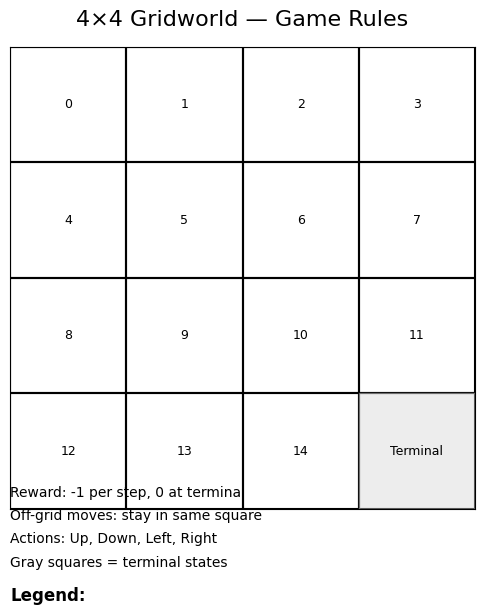

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

n_rows, n_cols = 4, 4
terminal_states = {(3,3)}

def draw_gridworld_rules():
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_xlim(-0.5, n_cols-0.5)
    ax.set_ylim(n_rows-0.5, -0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('4×4 Gridworld — Game Rules', fontsize=16, pad=15)

    # Draw grid
    for r in range(n_rows):
        for c in range(n_cols):
            rect = patches.Rectangle((c-0.5, r-0.5), 1, 1, fill=False, linewidth=1.5)
            ax.add_patch(rect)
            if (r,c) in terminal_states:
                ax.add_patch(patches.Rectangle((c-0.5, r-0.5), 1, 1, fill=True, color='lightgray', alpha=0.4))
                ax.text(c, r, 'Terminal', ha='center', va='center', fontsize=9, color='black')
            else:
                ax.text(c, r, f"{r*4+c}", ha='center', va='center', fontsize=9, color='black')

    ax.text(-0.5, 4.0, "Gray squares = terminal states")
    ax.text(-0.5, 3.8, "Actions: Up, Down, Left, Right")
    ax.text(-0.5, 3.6, "Off-grid moves: stay in same square")
    ax.text(-0.5, 3.4, "Reward: -1 per step, 0 at terminal", fontsize=10)

    plt.show()

draw_gridworld_rules()
